<a href="https://colab.research.google.com/github/fulasho/Data-Analytics-201/blob/main/Data201_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this Capstone project is to study the violation issued by the Business integrity commission to an approved and unlicensed company in the trade waste industry in the United States of America. Some of the essential questions for developing this project are: founding out the total number issued violation in each state involved in the trade waste industry at the same time classify them by borough. At last, we going to try to find the maximum and minimum fine paid by companies and what was the reason. 


The data set BIC issued violation used for this analysis was taken from NYC OpenData. It contains violation issued by the business integrity commission (BIC) for companies operating in the trade waste industry. This dataset was created on December 26, 2018, and the last update was on January 24, 2022. 
This dataset contains 7324 rows and 31 Columns each row is an issued violation. Among these rows we had 53 duplicated and 0 null values. 
It has 3 different types of data: float, object, and bool. 

The first violation issued was in September 2002 and the last was in January 2022.


The tools for data analysis used in this project are the packages Numpy and Pandas, and to visualize and explore the data: Matplotlib and Seaborn.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/sample_data/BIC_Issued_Violations.csv')

In [3]:
df.head()

,VIOLATION NUMBER,BIC NUMBER,ACCOUNT NAME,TYPE OF VIOLATION,VIOLATION PHASE,VIOLATION DISPOSITION,ACCOUNT TYPE,VIOLATION ACCOUNT ADDRESS,VIOLATION ACCOUNT CITY,VIOLATION ACCOUNT STATE,VIOLATION ACCOUNT POSTCODE,BOROUGH OF VIOLATION,DATE OF VIOLATION,DATE VIOLATION ISSUED,MAXIMUM FINE,FINE AMOUNT,DATE FINE PAID,EARLY SETTLEMENT VIOLATION,SETTLEMENT DATE,RULE CODE,NUMBER OF COUNTS,DESCRIPTION OF RULE,EXPORT DATE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,TWC-220836,NaN,"BLACKRIDGE CONSTRUCTION, LLC.",OATH,Issued,Settled,Unlicensed,1162 GRINNELL PLACE,BRONX,NY,10474,Bronx,01/12/2021,2021-06-09T16:41:00.000Z,10000.0,250.0,06/10/2021,True,NaN,17 RCNY 5-08(n),1.0,Failed to provide off-street parking for vehic...,01/18/2022,40.812194,-73.894012,2.0,17.0,93.0,2094348.0,2.027360e+09,Hunts Point
1,TWC-218141,1641.0,"LIFFEY VAN LINES, INC.",OATH,Issued,Settled,CL1,NaN,NaN,NaN,NaN,NaN,10/25/2019,2019-10-25T18:25:00.000Z,1000.0,250.0,10/29/2019,False,NaN,17 RCNY 2-05(b),1.0,Failed to timely notify Commission of a materi...,01/18/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TWC-211515,4301.0,THE ASTOR COMPANY,OATH,Issued,Settled,CL2 - Broker,724 ENTERPRISE DRIVE,OAK BROOK,IL,60523,NaN,03/23/2015,2015-03-23T16:05:00.000Z,49000.0,1200.0,03/24/2015,False,NaN,NYC AC 16-505(b),19.0,Removed collected or disposed of trade waste o...,01/18/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TWC-211492,311.0,CROWN WASTE CORP,OATH,Issued,Settled,License,P.O. BOX 1133,BETHPAGE,NY,11714,Manhattan,03/18/2015,2015-07-10T14:32:00.000Z,0.0,600.0,07/15/2015,False,NaN,17 RCNY 3-01(a),1.0,Failed to disclose employee,01/18/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TWC-218430,NaN,RAFAEL TEJADA,OATH,Issued,Settled,Unlicensed,508 W 136th Street APT 12,New York,NY,10031,Manhattan,01/08/2020,2020-01-31T19:07:00.000Z,5000.0,2500.0,08/18/2021,False,NaN,NYC AC 16-505(a),1.0,Removed collected or disposed of trade waste o...,01/18/2022,40.819990,-73.952753,9.0,7.0,22301.0,1059801.0,1.019880e+09,Manhattanville


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7316 entries, 0 to 7315
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   VIOLATION NUMBER            7316 non-null   object 
 1   BIC NUMBER                  2760 non-null   float64
 2   ACCOUNT NAME                7316 non-null   object 
 3   TYPE OF VIOLATION           7316 non-null   object 
 4   VIOLATION PHASE             7316 non-null   object 
 5   VIOLATION DISPOSITION       7316 non-null   object 
 6   ACCOUNT TYPE                7316 non-null   object 
 7   VIOLATION ACCOUNT ADDRESS   7157 non-null   object 
 8   VIOLATION ACCOUNT CITY      7155 non-null   object 
 9   VIOLATION ACCOUNT STATE     7156 non-null   object 
 10  VIOLATION ACCOUNT POSTCODE  7152 non-null   object 
 11  BOROUGH OF VIOLATION        6509 non-null   object 
 12  DATE OF VIOLATION           7316 non-null   object 
 13  DATE VIOLATION ISSUED       7316 

In [5]:
df.duplicated().sum()

53

In [6]:
df.drop_duplicates(subset=None, keep='first',inplace=True, ignore_index=False)

In [7]:
df.duplicated().sum()

0

In [8]:
df["DATE VIOLATION ISSUED"].min()

'2002-09-03T04:00:00.000Z'

In [9]:
df["DATE VIOLATION ISSUED"].max()

'2022-01-18T15:37:00.000Z'

In [10]:
# Let drop some columns that is unnecessary to this analysis

In [11]:
drop_cols=['BIC NUMBER','ACCOUNT TYPE','VIOLATION ACCOUNT ADDRESS','VIOLATION PHASE','DATE OF VIOLATION','DATE VIOLATION ISSUED','DATE FINE PAID','SETTLEMENT DATE','EXPORT DATE','Latitude','Longitude','Community Board','Council District','Census Tract','BIN','BBL','NTA']
df.drop(drop_cols, inplace=True, axis=1)

In [12]:
df.head()

,VIOLATION NUMBER,ACCOUNT NAME,TYPE OF VIOLATION,VIOLATION DISPOSITION,VIOLATION ACCOUNT CITY,VIOLATION ACCOUNT STATE,VIOLATION ACCOUNT POSTCODE,BOROUGH OF VIOLATION,MAXIMUM FINE,FINE AMOUNT,EARLY SETTLEMENT VIOLATION,RULE CODE,NUMBER OF COUNTS,DESCRIPTION OF RULE
0,TWC-220836,"BLACKRIDGE CONSTRUCTION, LLC.",OATH,Settled,BRONX,NY,10474,Bronx,10000.0,250.0,True,17 RCNY 5-08(n),1.0,Failed to provide off-street parking for vehic...
1,TWC-218141,"LIFFEY VAN LINES, INC.",OATH,Settled,NaN,NaN,NaN,NaN,1000.0,250.0,False,17 RCNY 2-05(b),1.0,Failed to timely notify Commission of a materi...
2,TWC-211515,THE ASTOR COMPANY,OATH,Settled,OAK BROOK,IL,60523,NaN,49000.0,1200.0,False,NYC AC 16-505(b),19.0,Removed collected or disposed of trade waste o...
3,TWC-211492,CROWN WASTE CORP,OATH,Settled,BETHPAGE,NY,11714,Manhattan,0.0,600.0,False,17 RCNY 3-01(a),1.0,Failed to disclose employee
4,TWC-218430,RAFAEL TEJADA,OATH,Settled,New York,NY,10031,Manhattan,5000.0,2500.0,False,NYC AC 16-505(a),1.0,Removed collected or disposed of trade waste o...


In [13]:
df['VIOLATION NUMBER'].is_unique

False

In [14]:
df['DESCRIPTION OF RULE']

0       Failed to provide off-street parking for vehic...
1       Failed to timely notify Commission of a materi...
2       Removed collected or disposed of trade waste o...
3                             Failed to disclose employee
4       Removed collected or disposed of trade waste o...
                              ...                        
7311    Failed to timely notify Commission of a materi...
7312    Registrant failed to maintain clean and unobst...
7313    Removed collected or disposed of trade waste o...
7314    Failure to mark container with name, license n...
7315       Failed to maintain or produce required records
Name: DESCRIPTION OF RULE, Length: 7263, dtype: object

In [24]:
# Let found out total number issued violation for each state involved in the trade waste industry by using the groupby function

In [16]:
df.groupby(['VIOLATION ACCOUNT STATE'])['VIOLATION NUMBER'].count().sort_values(ascending=False)

VIOLATION ACCOUNT STATE
NY            5850
NJ            1034
PA              43
CT              39
IL              21
MA              19
FL              11
GA              11
NC              10
VA               9
New York         8
MD               6
N Y              5
MN               5
WA               4
OH               4
CA               3
ny               3
TX               3
MI               2
SC               2
TN               2
NY 10033         1
New Jersey       1
Ny               1
DE               1
VT               1
Bronx            1
AZ               1
10306            1
10030            1
Name: VIOLATION NUMBER, dtype: int64

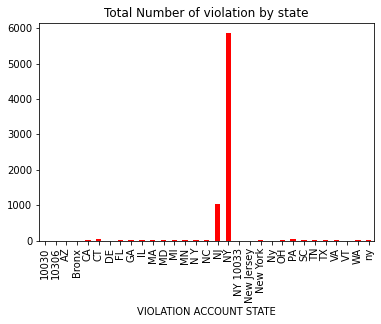

In [17]:
df.groupby(['VIOLATION ACCOUNT STATE'])['VIOLATION NUMBER'].count().plot(kind="bar", color=('red'),title ='Total Number of violation by state')
plt.rc('font', size=14)

In [18]:
df.groupby(['BOROUGH OF VIOLATION'])['VIOLATION NUMBER'].count().sort_values(ascending=False)

BOROUGH OF VIOLATION
Manhattan        2278
Brooklyn         1684
Bronx            1281
Queens            783
Staten Island     356
NEW JERSEY         28
LONG ISLAND        21
MASSACHUSETTS      10
WESTCHESTER         8
Other               8
INTERNET            2
Name: VIOLATION NUMBER, dtype: int64

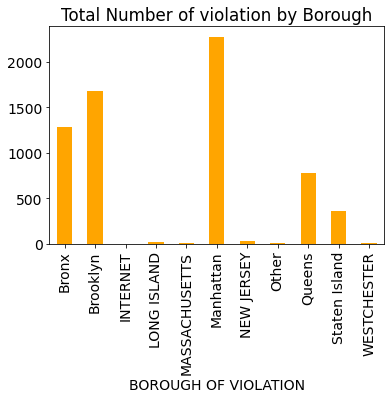

In [23]:
df.groupby(['BOROUGH OF VIOLATION'])['VIOLATION NUMBER'].count().plot(kind='bar',color=('orange'),title='Total Number of violation by Borough')
plt.rc('font', size=14)

In [20]:
# In this part we going to try to found out what company has been issued the highest and the least fine and what was the violation

In [21]:
df.groupby(['ACCOUNT NAME','VIOLATION ACCOUNT STATE','RULE CODE'])['FINE AMOUNT'].max().sort_values(ascending=False)

ACCOUNT NAME                                        VIOLATION ACCOUNT STATE  RULE CODE         
WASTE CONNECTIONS OF NEW YORK, INC.                 NJ                       17 RCNY 5-03(b)       300000.0
                                                                             17 RCNY 5-05(b)       300000.0
                                                                             17 RCNY 5-05(a)(1)    300000.0
                                                                             17 RCNY 5-05(b)(4)    300000.0
                                                                             17 RCNY 5-02(a)       300000.0
                                                                                                     ...   
York Construction Inc. dba AM-Building Maintenance  NY                       NYC AC 16-505(a)           NaN
Young Nmi Kim dba Tri State Construction            NY                       NYC AC 16-505(a)           NaN
ZX Foods Inc.                           

In [22]:
df.groupby(['ACCOUNT NAME','VIOLATION ACCOUNT STATE','RULE CODE'])['FINE AMOUNT'].min()

ACCOUNT NAME                              VIOLATION ACCOUNT STATE  RULE CODE             
# 1 WASTE & RECYCLER INC.                 NY                       17 RCNY 1-09               500.0
                                                                   17 RCNY 2-05(a)(2)           0.0
                                                                   17 RCNY 2-05(a)(3)           0.0
                                                                   17 RCNY 2-05(a)(4)           0.0
                                                                   17 RCNY 2-05(a)(6)           0.0
                                                                                              ...  
Zack's Removal Rubbish LLC. dba S/A/A     NY                       NYC AC 16-505(a)             NaN
Zaim Contracting Corp                     NY                       17 RCNY 2-05(b)(1)(vi)     500.0
Zbigniew Borawski dba Borek Construction  NY                       NYC AC 16-505(a)          2500.0
Zengo Maso

**Findings and Conclusions, after cleaning,tidying and analyzing the data, I came to conclusion that New York state has the highest** **5850**(see plot1) issued violation related to the waste trade industry followed by New Jersey and PA respectively **1034** and **43**. In order to answer the second question, I had to classify the issued violations by borough and the founding is that NYC five Borough (Manthan, Brooklyn, Bronx, Queen, Bronx, and Staten Island) have the most issued violation followed by New Jersey and Massachusetts.

Waste connection of New York Inc. paid the highest fine $300,000 for multiple infractions:
Failed to timely apply for Commission approval before subcontracting or assigning a contract                                                                       Failed to properly maintain business records,                                                                        Failed to obtain Commission authorization for subcontracting or assignment.

On the other hand, West and Recycler Inc. in New York state paid $500 fine the least for:
Failed to maintain clean and odor free vehicle or container. 
Failed to comply with all laws, rules, and regulations of federal, state, and local government.
                                                                                            
                                                                          
